Introduction

We will be using the Human Activity Recognition with Smartphones database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

    Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
    Triaxial Angular velocity from the gyroscope
    A 561-feature vector with time and frequency domain variables
    The activity label

More information about the features are available on the website linked above.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

## Question 1

Import the data and do the following:

    Examine the data types--there are many columns, so it might be wise to use value counts.
    
    Determine if the floating point values need to be scaled.
    
    Determine the breakdown of each activity.
    
    Encode the activity label as an integer.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Human_Activity_Recognition_Using_Smartphones_Data.csv")

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [ ]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(10299, 562)

In [ ]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [ ]:
df.columns[df.dtypes == object]

Index(['Activity'], dtype='object')

In [ ]:
# choose all rows and all columns except last column
(df.iloc[:, :-1].min() == -1 ).value_counts()

True    561
dtype: int64

In [ ]:

# choose all rows and all columns except last column
df.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

The min value is -1 and max.value is 1.

So the data is already scaled.

In [ ]:
df['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

So the columns with float valused are scaled from -1 to 1

---



The column activity is the label or the target -->> balanced dataset -->> use roc curve and accuracy also can be used for evaluation

We should transform the target column from being string to be digits so the logistic regression model can handle it

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])
df['Activity'].sample(5)

6484     2
2303     3
5418     4
7338     5
10166    1
Name: Activity, dtype: int64

## Question 2

    Calculate the correlations between the dependent variables.
    
    Create a histogram of the correlation values.
    
    Identify those that are most correlated (either positively or negatively).



In [ ]:
# Calculate the correlation values between dependent variables
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()

In [ ]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


In [ ]:
# Simplify by emptying all the data below the diagonal
# tril_indices_from returns the lower rigth triangle indicies
tril_index = np.tril_indices_from(corr_values)


In [ ]:
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [ ]:
# Make the unused values NaNs
for coord in zip(*tril_index):
    #print(coord)
    corr_values.iloc[coord[0], coord[1]] = np.NaN

In [ ]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [ ]:
corr_values = corr_values.stack().to_frame()
corr_values

0
tBodyAcc-mean()-X                    tBodyAcc-mean()-Y     0.128037
                                     tBodyAcc-mean()-Z    -0.230302
                                     tBodyAcc-std()-X      0.004590
                                     tBodyAcc-std()-Y     -0.016785
                                     tBodyAcc-std()-Z     -0.036071
...                                                             ...
angle(tBodyGyroJerkMean,gravityMean) angle(Y,gravityMean) -0.004582
                                     angle(Z,gravityMean) -0.012549
angle(X,gravityMean)                 angle(Y,gravityMean) -0.748249
                                     angle(Z,gravityMean) -0.635231
angle(Y,gravityMean)                 angle(Z,gravityMean)  0.545614

[157080 rows x 1 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(corr_values, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(corr_values, *[0], **{})
chart

In [ ]:
corr_values =corr_values.reset_index().rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'})

In [ ]:
corr_values

,index,feature1,feature2,correlation
0,0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...,...
157075,157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [ ]:
# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

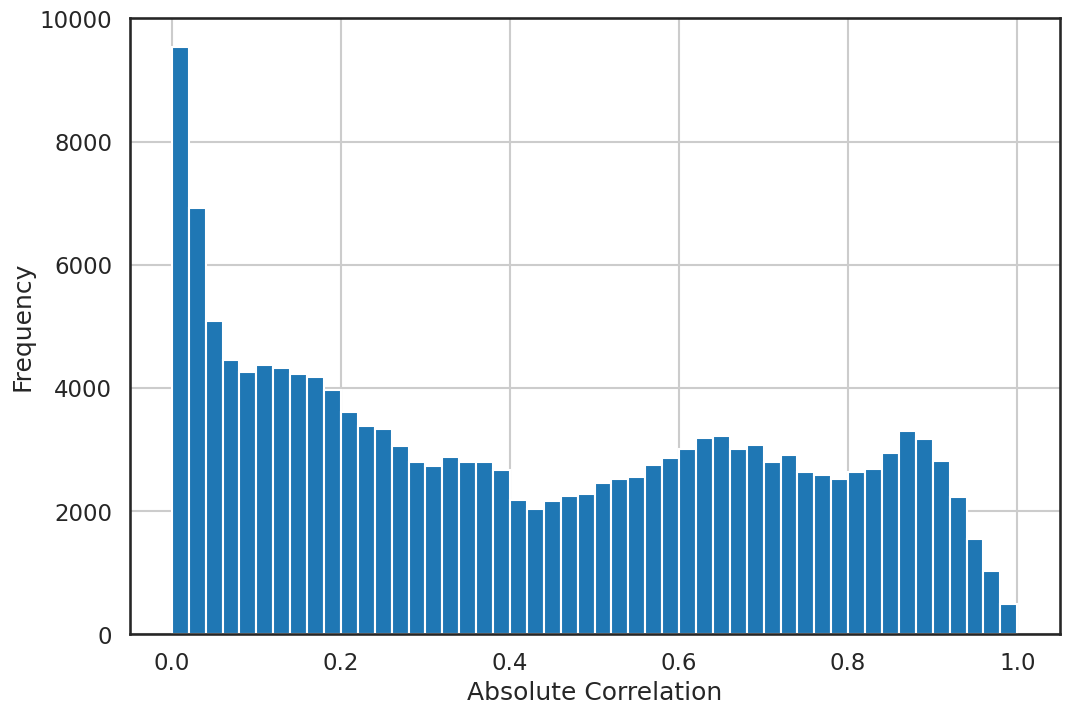

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

In [ ]:
# next : returns the next item in the generator
train_idx,test_idx = next(strat_shuf_split.split(df[feature_cols], df.Activity))

In [ ]:
train_idx

array([1575, 1707, 6425, ..., 3037, 3002,  996])

In [ ]:
# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Activity']

In [ ]:
x_test = df.loc[test_idx , feature_cols]
y_test = df.loc[test_idx , 'Activity']

In [ ]:
y_train.value_counts(normalize =True)


0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [ ]:
y_test.value_counts(normalize =True)


0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [ ]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=3, penalty='l2', solver='liblinear').fit(X_train, y_train)


Question 5¶

    Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.



In [ ]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    #coeffs
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

#coefficients.sample(10)

In [ ]:
coefficients

lr                                                          l1  \
            0         1         2         3         4         5         0   
0   -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084  0.000000   
1    0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193  0.000000   
2    0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526  0.000000   
3    0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120  0.000000   
4   -0.045407 -0.034154 -0.451850  0.260243 -0.516844  0.106248  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.022132 -0.659468  0.550630 -0.234924  0.385179 -0.351492  0.000000   
557  0.058454 -0.246969  0.268995 -0.162010 -0.157603  0.174153  0.000000   
558  1.599105 -2.473094 -0.854612 -0.313142 -0.712694  0.416311  2.869284   
559 -0.374313 -0.740397  1.771455 -0.242904 -0.275139  0.876728  0.000000   
560 -0.188309 -0.298022  0.416920  0.065047 -0.042363  0.438815  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
0    0.000000  0.000000 -1.883791  4.291054  0.000000 -0.135283 -0.728963   
1    0.000000  0.000000 -8.017818  0.000000  0.000000  0.029334 -0.418187   
2    0.000000  0.000000 -0.631218  0.000000  0.000000  0.040581 -0.168276   
3   -1.707506 -0.356675 -1.715139  0.000000  2.157562  0.019091 -1.130303   
4    0.000000 -1.389922  1.211163 -1.259700  0.000000 -0.035987  0.084813   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.760792  0.486798 -0.736716  0.469518 -0.738452 -0.142627 -0.734034   
557 -0.671277  0.864708 -0.487876 -0.040243  0.416312  0.119148 -0.374054   
558 -8.084429  0.000000 -0.286894 -0.590569  0.198004  2.949029 -3.847366   
559  0.000000  0.000000 -0.259948  0.000000  2.535436 -0.543058 -0.367310   
560  0.000000  0.000000 -0.537370  0.000000  2.379171 -0.230753 -0.224213   

                                             
            2         3         4         5  
0    1.204754 -0.358583  1.838860  0.158725  
1    0.291895 -0.117502  0.185907 -0.665353  
2    1.591758  0.111977  0.007059 -1.285497  
3   -0.672804 -1.353272  0.275198  2.435842  
4   -1.514792  0.659611 -0.976813  0.135855  
..        ...       ...       ...       ...  
556  0.718272 -0.474849  0.632147 -0.817494  
557  1.063212 -0.352357 -0.143796  0.447033  
558 -1.172189 -0.642145 -1.465388  1.206118  
559  3.353593 -0.669349 -0.663063  2.824912  
560  0.712565  0.091286 -0.086929  1.431147  

[561 rows x 18 columns]

In [ ]:
lr.predict_proba(x_test)

array([[3.44063390e-05, 1.68347341e-04, 5.67596485e-04, 9.98938794e-01,
        6.32093813e-06, 2.84534972e-04],
       [3.72778400e-05, 3.21174639e-07, 4.23786214e-06, 1.42501164e-04,
        1.16503493e-02, 9.88165313e-01],
       [3.55133258e-05, 4.35281311e-03, 2.96260675e-06, 9.87591627e-01,
        5.01054295e-03, 3.00654142e-03],
       ...,
       [2.38087789e-05, 9.69641880e-01, 3.03281770e-02, 4.11497822e-09,
        4.09015889e-06, 2.03971702e-06],
       [5.51867754e-05, 9.86840270e-01, 1.22429448e-03, 2.68622609e-07,
        2.89312560e-07, 1.18796911e-02],
       [7.06240054e-04, 1.97165827e-06, 2.49758099e-04, 8.28459848e-03,
        9.03576670e-04, 9.89853855e-01]])

In [ ]:
lr.predict(x_test)

array([3, 5, 3, ..., 1, 1, 5])

In [ ]:
y_pred= list()
y_prob = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels , coeff_models):
  y_pred.append(pd.Series(mod.predict(x_test),name = lab))
  coeff_label = pd.MultiIndex(levels = [[lab] , [0,1,2,3,4,5]],
                codes= [[0,0,0,0,0,0], [0,1,2,3,4,5]])
  y_prob.append(pd.DataFrame(mod.predict_proba(x_test),columns= coeff_label))

In [ ]:
y_pred = pd.concat(y_pred,axis = 1)

In [ ]:
y_prob = pd.concat(y_prob ,axis=1)

## Calculating metricies

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [ ]:
coeff_label = ['lr' ,'l1' ,'l2']
#coeff_model = [lr , lr_l1 ,lr_l2]
metrics = list()
for lab in coeff_label:
  precision , recall , fscore , _ = score(y_test , y_pred[lab],average = 'weighted')
  accuracy = accuracy_score(y_test , y_pred[lab])
  auc = roc_auc_score(label_binarize(y_test,classes=[0,1,2,3,4,5]) , y_prob[lab],average =  'weighted')
  metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore , 'accuracy':accuracy, 'auc':auc} ,name = lab))

In [ ]:
metrics = pd.concat(metrics ,axis =1)

In [ ]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.985124
recall,0.984142,0.983819,0.985113
fscore,0.984143,0.983815,0.985111
accuracy,0.984142,0.983819,0.985113
auc,0.999338,0.999367,0.999327
